In [13]:
import timetable_scheduler

@timetable_scheduler.timing
def test_instance_creator(term_id: int, availability_p: float, **kwargs):
    results = {}
    iterations = 0
    timetable_scheduler.create_dataset(term_id=term_id, lecturer_p=availability_p, room_p=availability_p)
    for Tmax, Tmin in zip([20, 50, 80, 100], [5, 10, 15, 20]):
        for kmax in [1, 3, 5]:
            for alpha in [0.95, 0.995, 0.999]:
                results[(Tmax, Tmin, kmax, alpha)] = []
                setup = timetable_scheduler.StatisticalTestsAlgorithmSetup(Tmax=Tmax, Tmin=Tmin, kmax=kmax, alpha=alpha, **kwargs)
                for i in range(10):
                    result = setup.SA()
                    results[(Tmax, Tmin, kmax, alpha)].append(result)
                    iterations += 1
                    print('-'*10, iterations, '-'*10)
    return results



In [14]:
results, time = test_instance_creator(term_id=5, availability_p=0.7, cooling_schedule=timetable_scheduler.simulated_annealing.linear_cooling_schedule)

zresetowałem początkowe rozwiązanie 0-razy
2264.8
20
19.1
18.2
17.3
16.4
15.5
14.6
13.7
12.8
11.9
11.0
10.1
9.2
8.299999999999999
7.4
6.5
5.6
Best cost = 2264.8
zresetowałem początkowe rozwiązanie 0-razy
2070.4
20
19.05
18.1
17.15
16.2
15.25
14.3
13.350000000000001
12.4
11.450000000000001
10.5
9.55
8.600000000000001
7.65
6.700000000000001
5.75
Best cost = 2052.4
zresetowałem początkowe rozwiązanie 1-razy
2292.2
20
19.01
18.02
17.03
16.04
15.05
14.06
13.07
12.08
11.09
10.1
9.11
8.120000000000001
7.130000000000001
6.140000000000001
5.15
Best cost = 2248.2
zresetowałem początkowe rozwiązanie 0-razy
2476.2
20
17.3
14.6
11.9
9.2
6.5
Best cost = 2430.0
zresetowałem początkowe rozwiązanie 0-razy
2165.0
20
17.15
14.3
11.450000000000001
8.600000000000001
5.75
Best cost = 2165.0
zresetowałem początkowe rozwiązanie 0-razy
2139.0
20
17.03
14.06
11.09
8.120000000000001
5.15
Best cost = 2139.0
zresetowałem początkowe rozwiązanie 1-razy
2198.0
20
15.5
11.0
6.5
Best cost = 2136.2
zresetowałem początko

In [ ]:
print(time)

In [15]:
results

{(20,
  5,
  1,
  0.9): [StatisticalResults(initial_solution_matrix=array([[[56, 56, 56, ..., 56, 56, 56],
          [56, 56, 56, ..., 56, 56, 56],
          [56, 56, 56, ..., 56, 56, 56],
          ...,
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0]],
  
         [[39, 39, 39, ..., 39, 39, 39],
          [39, 39, 39, ..., 39, 39, 39],
          [39, 39, 39, ..., 39, 39, 39],
          ...,
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0]],
  
         [[ 1,  1,  1, ...,  1,  1,  1],
          [ 1,  1,  1, ...,  1,  1,  1],
          [ 1,  1,  1, ...,  1,  1,  1],
          ...,
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0]],
  
         [[89, 89, 89, ..., 89, 89, 89],
          [89, 89, 89, ..., 89, 89, 89],
          [89, 89, 89, ..., 89, 89, 89],
          ...,
 

Rozwiązanie początkowe

In [16]:
initial_solutions = {}
for parameters, result in results.items():
    mean = sum([r.initial_cost for r in result])/len(result)
    initial_solutions[str(parameters)] = mean


In [17]:
initial_solutions_means = list(initial_solutions.values())

d:\.semestr 5\aibd\laboratorium-6-dominik-air\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

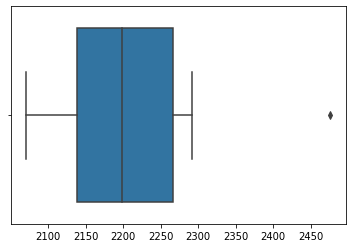

In [18]:
import seaborn as sns

sns.boxplot(initial_solutions_means)

<AxesSubplot:ylabel='Count'>

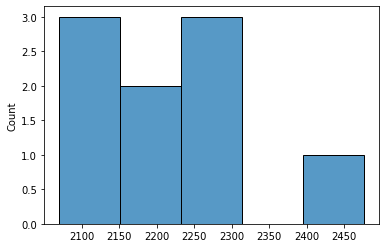

In [19]:
sns.histplot(initial_solutions_means)

Rozwiązanie końcowe(najlepsze)

In [20]:
final_solutions = {}
best_parameters = None
best_cost = 0
for parameters, result in results.items():
    mean = sum([r.best_cost for r in result])/len(result)
    if best_parameters is None or best_cost > mean:
        best_cost = mean
        best_parameters = str(parameters)
    final_solutions[str(parameters)] = mean

In [ ]:
print(best_parameters)
print(best_cost)

In [21]:
def sort_results(x):
    return {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

for k, v in sort_results(final_solutions).items():
    print(k, v)

(20, 5, 1, 0.95) 2052.4
(20, 5, 5, 0.99) 2131.6
(20, 5, 5, 0.9) 2136.2
(20, 5, 3, 0.99) 2139.0
(20, 5, 3, 0.95) 2165.0
(20, 5, 1, 0.99) 2248.2
(20, 5, 1, 0.9) 2264.8
(20, 5, 5, 0.95) 2266.8
(20, 5, 3, 0.9) 2430.0


save to json

In [22]:
json_data = {str(parameters): [r.to_json() for r in result] for parameters, result in results.items()}

In [23]:
import json
with open('statistics/linear_cooling_schedule.json', 'w') as f:
    json.dump(json_data, f, indent=4)

In [23]:
# for another cooling schedule
results, time = test_instance_creator(term_id=5, availability_p=0.7, cooling_schedule=timetable_scheduler.simulated_annealing.exponential_cooling_schedule)

In [ ]:
print(time)

In [ ]:
json_data = {str(parameters): [r.to_json() for r in result] for parameters, result in results.items()}

with open('statistics/exponential_cooling_schedule.json', 'w') as f:
    json.dump(json_data, f, indent=4)